分离状态,共享单agent训练,针对局部视野采用CNN，这个目前还是就默认本地卸载
Separated state, shared single agent training, using CNN for local field of view, which is currently assumed to be uninstalled locally


In [2]:
import numpy as np
def moving_average(a, window_size):
    cumulative_sum = np.cumsum(np.insert(a, 0, 0)) 
    middle = (cumulative_sum[window_size:] - cumulative_sum[:-window_size]) / window_size
    r = np.arange(1, window_size-1, 2)
    begin = np.cumsum(a[:window_size-1])[::2] / r
    end = (np.cumsum(a[:-window_size:-1])[::2] / r)[::-1]
    return np.concatenate((begin, middle, end))

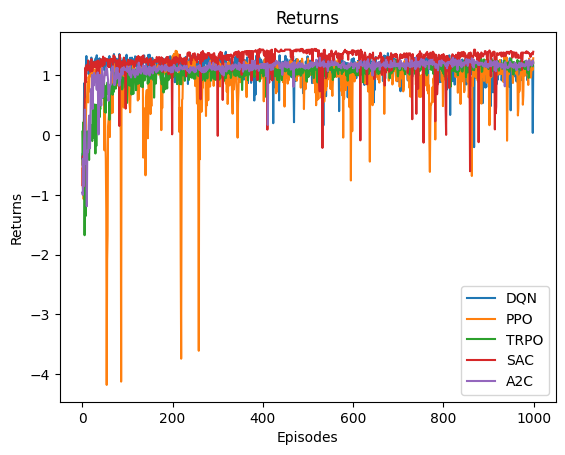

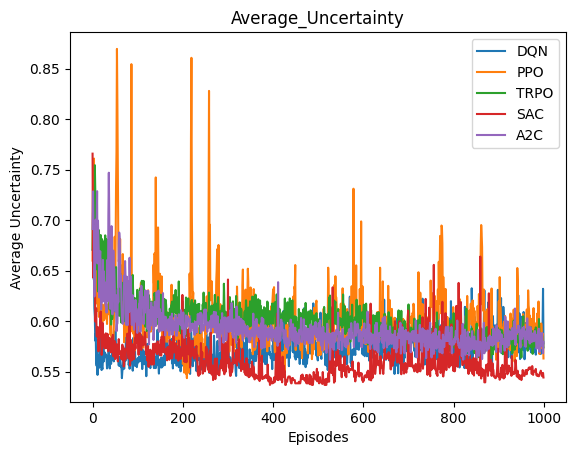

In [9]:
import pickle
import matplotlib.pyplot as plt
# 读取
with open("mdqn_returns.pkl", "rb") as f:
    mdqn_return_list, mdqn_return_list_2 = pickle.load(f)
with open("mppo_returns.pkl", "rb") as f:
    mppo_return_list, mppo_return_list_2 = pickle.load(f)
with open("mtrpo_returns.pkl", "rb") as f:
    mtrpo_return_list, mtrpo_return_list_2 = pickle.load(f)
with open("msac_returns.pkl", "rb") as f:
    msac_return_list, msac_return_list_2 = pickle.load(f)
with open("ma2c_returns.pkl", "rb") as f:
    ma2c_return_list, ma2c_return_list_2 = pickle.load(f)

min_episodes=1000
plt.plot(mdqn_return_list[:min_episodes], label='DQN')
plt.plot(mppo_return_list[:min_episodes], label='PPO')
plt.plot(mtrpo_return_list[:min_episodes], label='TRPO')
plt.plot(msac_return_list[:min_episodes], label='SAC')
plt.plot(ma2c_return_list[:min_episodes], label='A2C')
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Returns')
plt.legend()  # 显示图例
plt.show()

plt.plot(mdqn_return_list_2[:min_episodes], label='DQN')
plt.plot(mppo_return_list_2[:min_episodes], label='PPO')
plt.plot(mtrpo_return_list_2[:min_episodes], label='TRPO')
plt.plot(msac_return_list_2[:min_episodes], label='SAC')
plt.plot(ma2c_return_list_2[:min_episodes], label='A2C')
plt.xlabel('Episodes')
plt.ylabel('Average Uncertainty')
plt.title('Average_Uncertainty')
plt.legend()  # 显示图例
plt.show()

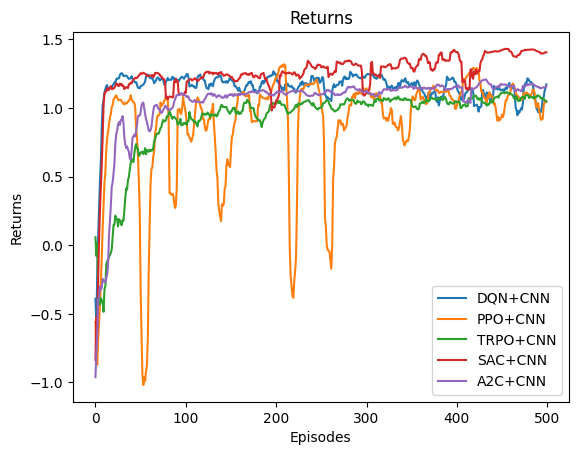

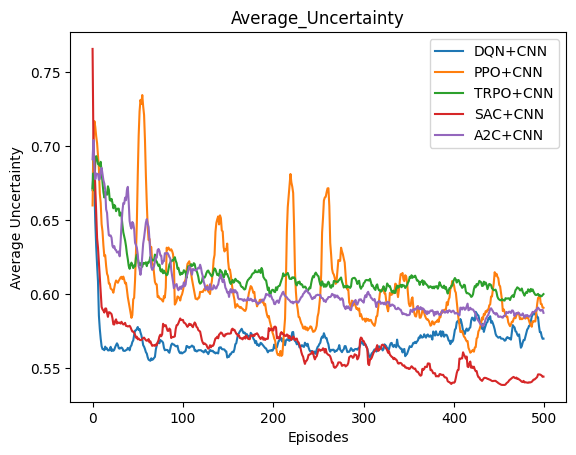

In [10]:
import pickle
import matplotlib.pyplot as plt
# 读取
with open("mdqn_returns.pkl", "rb") as f:
    mdqn_return_list, mdqn_return_list_2 = pickle.load(f)
with open("mppo_returns.pkl", "rb") as f:
    mppo_return_list, mppo_return_list_2 = pickle.load(f)
with open("mtrpo_returns.pkl", "rb") as f:
    mtrpo_return_list, mtrpo_return_list_2 = pickle.load(f)
with open("msac_returns.pkl", "rb") as f:
    msac_return_list, msac_return_list_2 = pickle.load(f)
with open("ma2c_returns.pkl", "rb") as f:
    ma2c_return_list, ma2c_return_list_2 = pickle.load(f)

mv_mdqn_return_list=moving_average(mdqn_return_list, 9)
mv_mppo_return_list=moving_average(mppo_return_list, 9)
mv_mtrpo_return_list=moving_average(mtrpo_return_list, 9)
mv_msac_return_list=moving_average(msac_return_list, 9)
mv_ma2c_return_list=moving_average(ma2c_return_list, 9)
mv_mdqn_return_list_2=moving_average(mdqn_return_list_2, 9)
mv_mppo_return_list_2=moving_average(mppo_return_list_2, 9)
mv_mtrpo_return_list_2=moving_average(mtrpo_return_list_2, 9)
mv_msac_return_list_2=moving_average(msac_return_list_2, 9)
mv_ma2c_return_list_2=moving_average(ma2c_return_list_2, 9)

min_episodes=500
plt.plot(mv_mdqn_return_list[:min_episodes], label='DQN+CNN')
plt.plot(mv_mppo_return_list[:min_episodes], label='PPO+CNN')
plt.plot(mv_mtrpo_return_list[:min_episodes], label='TRPO+CNN')
plt.plot(mv_msac_return_list[:min_episodes], label='SAC+CNN')
plt.plot(mv_ma2c_return_list[:min_episodes], label='A2C+CNN')
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Returns')
plt.legend()  # 显示图例
plt.show()

plt.plot(mv_mdqn_return_list_2[:min_episodes], label='DQN+CNN')
plt.plot(mv_mppo_return_list_2[:min_episodes], label='PPO+CNN')
plt.plot(mv_mtrpo_return_list_2[:min_episodes], label='TRPO+CNN')
plt.plot(mv_msac_return_list_2[:min_episodes], label='SAC+CNN')
plt.plot(mv_ma2c_return_list_2[:min_episodes], label='A2C+CNN')
plt.xlabel('Episodes')
plt.ylabel('Average Uncertainty')
plt.title('Average_Uncertainty')
plt.legend()  # 显示图例
plt.show()